In [2]:
pip show keras

Name: Keras
Version: 2.2.5
Summary: Deep Learning for humans
Home-page: https://github.com/keras-team/keras
Author: Francois Chollet
Author-email: francois.chollet@gmail.com
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: keras-applications, scipy, keras-preprocessing, h5py, numpy, pyyaml, six
Required-by: textgenrnn, keras-vis, kapre, fancyimpute


In [1]:
pip show tensorflow

Name: tensorflow
Version: 2.2.0rc2
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: absl-py, tensorboard, scipy, six, protobuf, termcolor, grpcio, tensorflow-estimator, wheel, numpy, h5py, wrapt, opt-einsum, astunparse, google-pasta, gast, keras-preprocessing
Required-by: fancyimpute


In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


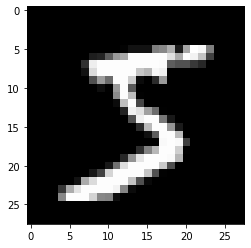

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(x_train[0, :, :], cmap='gray')

In [12]:
import tensorflow
tensorflow.compat.v1.disable_eager_execution()
from tensorflow.python.keras.layers import Conv2D, Input, Dense, Flatten, MaxPool2D
from keras.activations import *
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.optimizers import SGD, Adam
import tensorflow.python.keras.optimizers as optimizers
from tensorflow.keras.initializers import RandomNormal

def mnist_dense():
    n = 30
    input_ = Input(shape=(28, 28))
    flattened = Flatten()(input_)
    layer1 = Dense(n, activation='sigmoid')(flattened)
    layer2 = Dense(n, activation='sigmoid')(layer1)
    layer3 = Dense(n, activation='sigmoid')(layer2)
    layer4 = Dense(n, activation='sigmoid')(layer3)
    output = Dense(10, activation='sigmoid')(layer4)
    model = Model(inputs=input_, outputs=output)
    model.compile(optimizer=Adam(lr=3e-3), loss='mean_squared_error', metrics=['accuracy'])
    return model

def mnist_cnn(conv_kwargs):
    n = 30
    kernel_size = 3
    input_ = Input(shape=(28, 28, 1))
    conv1 = Conv2D(128, kernel_size, **conv_kwargs)(input_)
    pool1 = MaxPool2D(pool_size = (2, 2))(conv1)
    conv2 = Conv2D(64, kernel_size, **conv_kwargs)(pool1)
    pool1 = MaxPool2D(pool_size = (2, 2))(conv2)
    conv3 = Conv2D(32, kernel_size, **conv_kwargs)(pool1)
    pool1 = MaxPool2D(pool_size = (2, 2))(conv2)
    conv4 = Conv2D(16, kernel_size, **conv_kwargs)(conv3)
    pool2 = MaxPool2D(pool_size = (2, 2))(conv4)
    flattened = Flatten()(pool2)
    final = Dense(10)(flattened)
    output = softmax(final)
    
    model = Model(inputs=input_, outputs=output)
    model.compile(optimizer=Adam(lr=3e-3), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

conv_kwargs1 = {
        'strides': (1, 1),
        'padding': 'same',
        'activation': 'relu',
        'kernel_initializer': RandomNormal(mean=0.0, stddev=0.05, seed=None)
    }

conv_kwargs2 = {
        'strides': (1, 1),
        'padding': 'same',
        'activation': 'relu',
        'kernel_initializer': 'he_normal'
    }

conv_kwargs3 = {
        'strides': (1, 1),
        'padding': 'same',
        'activation': 'sigmoid',
        'kernel_initializer': RandomNormal(mean=0.0, stddev=0.05, seed=None)
    }

conv_kwargs4 = {
    'strides': (1, 1),
    'padding': 'same',
    'activation': 'sigmoid',
    'kernel_initializer': 'he_normal'
}

model1 = mnist_cnn(conv_kwargs1)
model2 = mnist_cnn(conv_kwargs2)
model3 = mnist_cnn(conv_kwargs3)
model4 = mnist_cnn(conv_kwargs4)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 128)       1280      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 7, 7, 32)          18464     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 7, 7, 16)          4624

In [ ]:
print(y_train.shape)
from keras.utils import to_categorical
y_train_prime = to_categorical(y_train)
x_train = x_train.squeeze()
x_train_shape = x_train.shape
x_train = x_train.reshape(list(x_train_shape) + [1])

history1 = model1.fit(x_train, y_train_prime, batch_size=None, epochs=5, verbose=1)
history2 = model2.fit(x_train, y_train_prime, batch_size=None, epochs=5, verbose=1)
history3 = model3.fit(x_train, y_train_prime, batch_size=None, epochs=5, verbose=1)
history4 = model4.fit(x_train, y_train_prime, batch_size=None, epochs=5, verbose=1)

(60000,)
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 228s 4ms/sample - loss: 0.1225 - accuracy: 0.9637
Epoch 2/5
60000/60000 [==============================] - 223s 4ms/sample - loss: 0.1021 - accuracy: 0.9700
Epoch 3/5
42976/60000 [====================>.........] - ETA: 1:02 - loss: 0.0955 - accuracy: 0.9719

In [16]:
[2, 2, 3] + [1]

[2, 2, 3, 1]

In [45]:
import numpy as np
import keras
from keras import backend as K

model = keras.Sequential()
model.add(keras.layers.Dense(20, input_shape = (10, )))
model.add(keras.layers.Dense(5))
model.compile('adam', 'mse')

dummy_in = np.ones((4, 10))
dummy_out = np.ones((4, 5))
dummy_loss = model.train_on_batch(dummy_in, dummy_out)

def get_weight_grad(model, inputs, outputs):
    """ Gets gradient of model for given inputs and outputs for all weights"""
    grads = model.optimizer.get_gradients(model.total_loss, model.trainable_weights)
    symb_inputs = (model._feed_inputs + model._feed_targets + model._feed_sample_weights)
    f = K.function(symb_inputs, grads)
    x, y, sample_weight = model._standardize_user_data(inputs, outputs)
    output_grad = f(x + y + sample_weight)
    return output_grad


def get_layer_output_grad(model, inputs, outputs, layer=-1):
    """ Gets gradient a layer output for given inputs and outputs"""
    grads = model.optimizer.get_gradients(model.total_loss, model.layers[layer].output)
    symb_inputs = (model._feed_inputs + model._feed_targets + model._feed_sample_weights)
    f = K.function(symb_inputs, grads)
    x, y, sample_weight = model._standardize_user_data(inputs, outputs)
    output_grad = f(x + y + sample_weight)
    return output_grad


weight_grads = get_weight_grad(model, dummy_in, dummy_out)
output_grad = get_layer_output_grad(model, dummy_in, dummy_out)

RuntimeError: ignored

In [28]:
import numpy as np
print(tensorflow.__version__)
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


def get_gradient_norm_func(model):
    grads = K.gradients(model.total_loss, model.trainable_weights)
    summed_squares = [K.sum(K.square(g)) for g in grads]
    #print(summed_squares)
    a = None
    for g in grads:
        if (a == None):
            a = K.sum(K.square(g))
        else:
            a += K.sum(K.square(g))
    print(K.eval(a))
    norm = K.sqrt(sum(summed_squares))
    #inputs = model.model._feed_inputs + model.model._feed_targets + model.model._feed_sample_weights
    inputs = model._feed_inputs + model._feed_targets + model._feed_sample_weights
    func = K.function(inputs, [norm])
    return func

def main():
    x = np.random.random((128,)).reshape((-1, 1))
    y = 2 * x
    input_ = Input(shape=(1,))
    l1 = Dense(2)(input_)
    l2 = Dense(1)(l1)
    #model = Sequential(layers=[Dense(2, input_shape=(1,)), Dense(1)])
    model = Model(inputs=input_, outputs=l2)
    model.compile(loss='mse', optimizer='rmsprop')
    get_gradient = get_gradient_norm_func(model)
    history = model.fit(x, y, epochs=1)
    print(get_gradient([x, y, np.ones(len(y))]))

if  __name__ == '__main__':
    main()

2.2.0-rc2


InvalidArgumentError: ignored

In [14]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

input_ = Input(shape=(2,))
probs = Dense(2, activation='softmax', name='probs')(input_)

model = Model(inputs=input_, outputs=probs)
model.compile(optimizer='sgd', loss='categorical_crossentropy')

model.total_loss

<tf.Tensor 'loss_4/mul:0' shape=() dtype=float32>